In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import vaex, pandas as pd

In [2]:
df = pd.read_csv('spam_ham_dataset.csv')

In [3]:
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [4]:
df.shape

(5171, 4)

In [5]:
df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [6]:
s = df['label'].value_counts()

In [7]:
s

ham     3672
spam    1499
Name: label, dtype: int64

# Visualization

<Axes: title={'center': 'Ham Vs Spam'}>

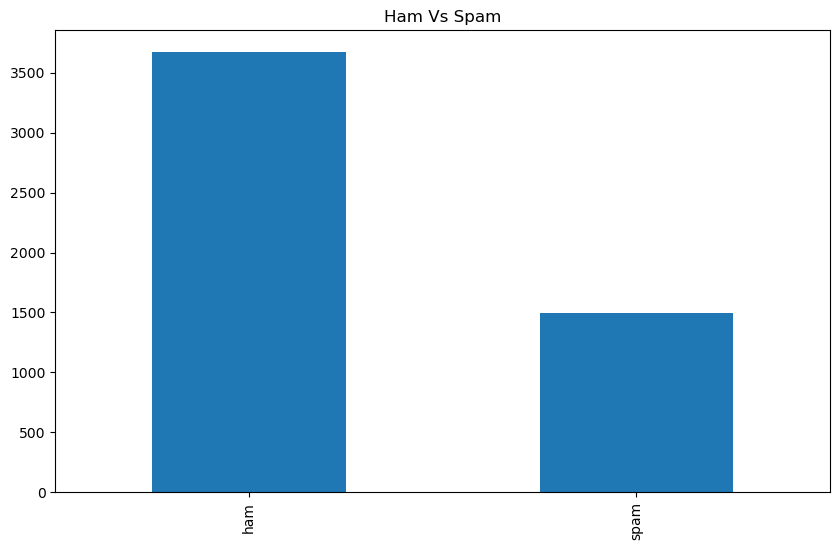

In [8]:
plt.figure(figsize =(10,6))
plt.title('Ham Vs Spam')
s.plot.bar()

# Drop Columns

In [9]:
df = df.iloc[:,2:]
df

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,0
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,Subject: industrial worksheets for august 2000...,0


In [10]:
df.rename(columns = {'label_num':'spam'}, inplace=True)

In [11]:
df

,text,spam
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,0
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,Subject: industrial worksheets for august 2000...,0


# Seperate X & Y

In [69]:
x = df.text.values
y = df.spam.values

# Train_Test_Split

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size = .25)

# Data Preprocessing

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
cv = CountVectorizer()

In [20]:
x_train = cv.fit_transform(xtrain)

In [21]:
x_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 2, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Algorithm Use

Naive Bayes

In [43]:
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB

In [44]:
mnb = MultinomialNB()

In [45]:
mnb.fit(x_train,ytrain)

MultinomialNB()

In [46]:
x_test = cv.transform(xtest)

In [47]:
x_test.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [48]:
mnb.score(x_test,ytest)

0.974477958236659

Support Vector Machine

In [49]:
# SVM
from sklearn.svm import SVC

In [50]:
svm = SVC()

In [51]:
svm.fit(x_train, ytrain)

SVC()

In [52]:
svm.score(x_test,ytest)

0.9566898685228151

Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rfc = RandomForestClassifier()

In [55]:
rfc.fit(x_train,ytrain)

RandomForestClassifier()

In [56]:
rfc.score(x_test,ytest)

0.9621036349574633

Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
dtc = DecisionTreeClassifier()

In [60]:
dtc.fit(x_train,ytrain)

DecisionTreeClassifier()

In [62]:
dtc.score(x_test,ytest)

0.9551430781129157

KNN 

In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
knn = KNeighborsClassifier(n_neighbors = 255)

In [67]:
knn.fit(x_train, ytrain)

KNeighborsClassifier(n_neighbors=255)

In [68]:
knn.score(x_test,ytest)

0.7633410672853829